In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (KFold, cross_val_score, 
                                     train_test_split, GridSearchCV)
from sklearn.metrics import (mean_squared_error, classification_report,
                            confusion_matrix, ConfusionMatrixDisplay,
                            RocCurveDisplay, roc_curve, roc_auc_score,
                            auc, accuracy_score)

from mlxtend.plotting import plot_decision_regions

from statsmodels.datasets import get_rdataset
from sklearn.datasets import load_iris

##  Labs
### Support Vector Classifier

In [107]:
x = np.random.randn(20,2)
y = np.repeat([-1,1],10)

x[y==1]+=1
x

array([[-1.27457966,  1.76926838],
       [ 0.56621835,  0.93738206],
       [-1.14695201,  0.81185541],
       [ 0.92782411, -0.40992754],
       [ 1.9038111 ,  0.05969591],
       [ 0.73408753, -1.50110915],
       [ 0.17744454,  1.89544346],
       [-0.47379905,  0.48521789],
       [-0.15942912, -0.51772993],
       [-1.19104769, -2.10974925],
       [ 2.36751066,  1.25065207],
       [ 1.62240185,  2.53416963],
       [ 1.14132584,  1.48511802],
       [ 1.93591198, -0.85266404],
       [ 0.64563162,  2.03131081],
       [-0.60066416,  1.09979165],
       [ 0.69485294,  0.95407969],
       [ 0.6394665 ,  1.37567815],
       [ 0.86987513,  0.45106215],
       [ 1.69096677,  0.45940343]])

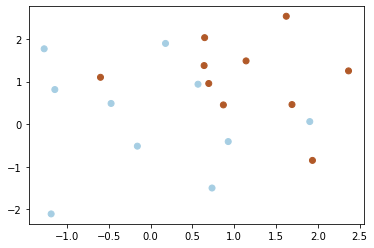

In [108]:
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)

In [109]:
svc = SVC(C = 10, kernel="linear").fit(x, y)

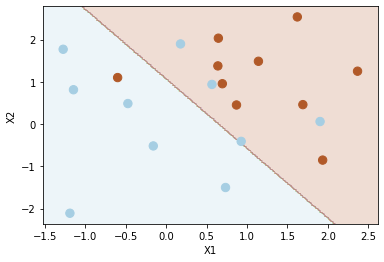

In [110]:
plot_svc(svc, x, y)

In [111]:
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-5, 5)
yy = a * xx - (svc.intercept_[0]) / w[1]

margin = 1 / np.sqrt(np.sum(svc.coef_**2))
yy_down = yy - np.sqrt(1 + a**2) * margin
yy_up = yy + np.sqrt(1 + a**2) * margin

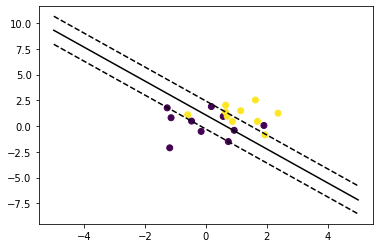

In [112]:
plt.plot(xx, yy, "k-")
plt.plot(xx, yy_down, "k--", xx, yy_up, "k--")
plt.scatter(x[:, 0], x[:, 1], c=y)

<AxesSubplot:>

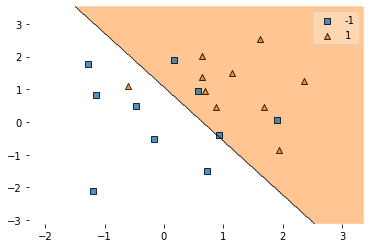

In [113]:
plot_decision_regions(x, y, clf = svc, )

In [2]:
def print_stats(clf:SVC):
    print(f"""
      kernel: {clf.kernel}
      cost: {clf.C}
      gamma: {clf.gamma}
    
    Number of support vectors: {sum(clf.n_support_)}
    {clf.n_support_}
    
    Number of classes: {len(clf.classes_)}
    {clf.classes_}
    """)

In [115]:
print_stats(svc)


      kernel: linear
      cost: 10
      gamma: scale
    
    Number of support vectors: 11
    [6 5]
    
    Number of classes: 2
    [-1  1]
    


In [116]:
svc = SVC(C = 0.1, kernel="linear").fit(x, y)
print_stats(svc)


      kernel: linear
      cost: 0.1
      gamma: scale
    
    Number of support vectors: 18
    [9 9]
    
    Number of classes: 2
    [-1  1]
    


<AxesSubplot:>

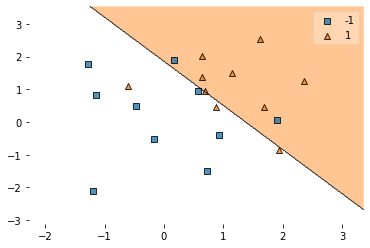

In [117]:
plot_decision_regions(x,y, svc)

<AxesSubplot:>

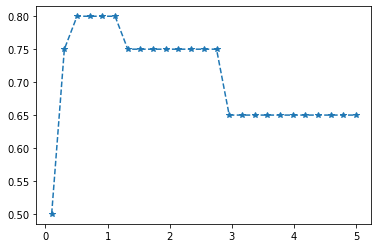

In [118]:
costs=np.linspace(0.1, 5, 25)
error = pd.Series(dtype=float)

cv = KFold(10)
for c in costs:
    svc = SVC(kernel="linear", C=c).fit(x,y)
    
    err = cross_val_score(svc, x, y, cv=cv, scoring="accuracy")
    error.loc[c] = err.mean()
error.plot(marker="*", ls="--")

In [119]:
tuned_params=[{"C":np.linspace(0.1, 5, 25)}]
svc = GridSearchCV( SVC(kernel="linear"), tuned_params, cv=10, scoring="accuracy")
svc.fit(x, y)

GridSearchCV(cv=10, estimator=SVC(kernel='linear'),
             param_grid=[{'C': array([0.1       , 0.30416667, 0.50833333, 0.7125    , 0.91666667,
       1.12083333, 1.325     , 1.52916667, 1.73333333, 1.9375    ,
       2.14166667, 2.34583333, 2.55      , 2.75416667, 2.95833333,
       3.1625    , 3.36666667, 3.57083333, 3.775     , 3.97916667,
       4.18333333, 4.3875    , 4.59166667, 4.79583333, 5.        ])}],
             scoring='accuracy')

In [124]:
svc.best_params_

{'C': 0.3041666666666667}

In [126]:
x_test = np.random.normal(size=(20*2)).reshape(20,2)
y_test = np.concatenate(([-1 for i in range(10)], [1 for i in range(10)]))
x_test[y_test==1]+=1

              precision    recall  f1-score   support

          -1       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10

    accuracy                           0.85        20
   macro avg       0.85      0.85      0.85        20
weighted avg       0.85      0.85      0.85        20



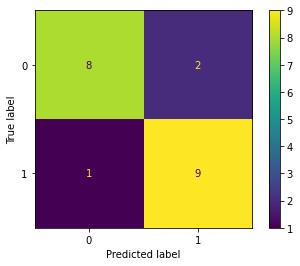

In [127]:
svc = SVC(C=0.3, kernel="linear").fit(x, y)

pred = svc.predict(x_test)
ConfusionMatrixDisplay(
    confusion_matrix(y_test, pred)
).plot()

print(classification_report(y_test, pred))

Now separating the classes further, so that they can be linearly separated

In [132]:
x[y==1]+=1.5

<AxesSubplot:>

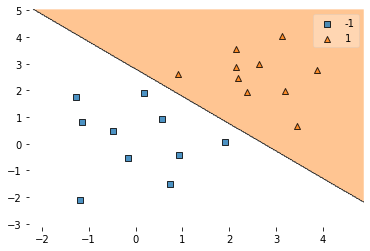

In [133]:
svc = SVC(C=10, kernel="linear").fit(x,y)
plot_decision_regions(x, y, svc)

In [134]:
x_test[y_test==1]+=1.5

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



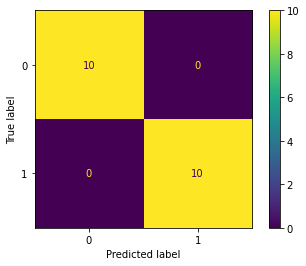

In [135]:
svc = SVC(C=10, kernel="linear").fit(x, y)

pred = svc.predict(x_test)
ConfusionMatrixDisplay(
    confusion_matrix(y_test, pred)
).plot()

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        10

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



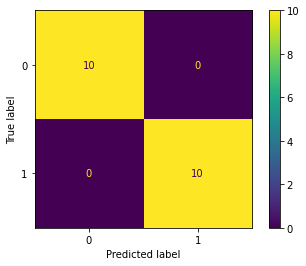

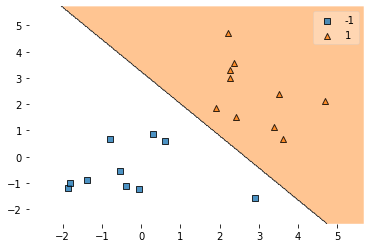

In [136]:
svc = SVC(C=0.3, kernel="linear").fit(x, y)

pred = svc.predict(x_test)
ConfusionMatrixDisplay(
    confusion_matrix(y_test, pred)
).plot()

plt.figure()
plot_decision_regions(x_test, y_test, svc)

print(classification_report(y_test, pred))

### Support Vector Machine

In [183]:
x = np.random.normal(size=(400)).reshape(200,2)
x[:100]+=2
x[100:150]-=2

y = np.array([0 for _ in range(150)] + [1 for _ in range(50)] )

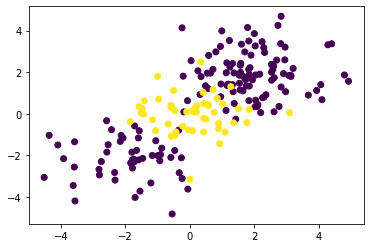

In [184]:
plt.scatter(x[:,0], x[:,1], c=y)

In [185]:
(x_train, x_test,
y_train, y_test) = train_test_split(x, y, train_size=100)

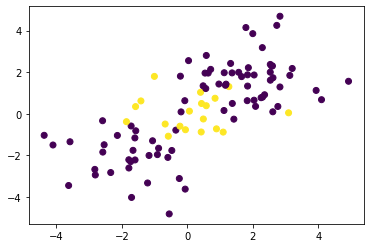

In [186]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train)

<AxesSubplot:>

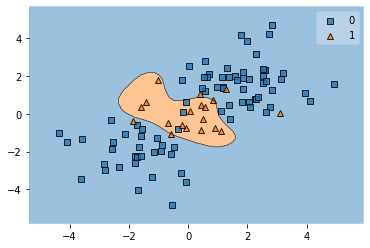

In [187]:
svc = SVC(gamma=1).fit(x_train, y_train)
plot_decision_regions(x_train, y_train, svc) 

In [188]:
print_stats(svc)


      kernel: rbf
      cost: 1.0
      gamma: 1
    
    Number of support vectors: 52
    [35 17]
    
    Number of classes: 2
    [0 1]
    


<AxesSubplot:>

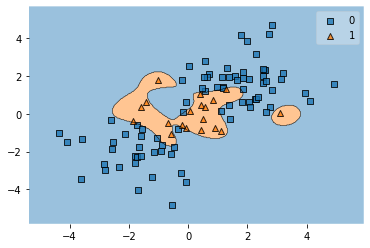

In [189]:
svc = SVC(gamma=1, C=1e5).fit(x_train, y_train)
plot_decision_regions(x_train, y_train, svc) 

In [190]:
costs = np.linspace(0.01, 10, 25)
gammas = np.arange(0.5, 5, 0.5)


errors = np.empty( (len(gammas), len(costs) ) )
cv=KFold(10)
for i, c in enumerate(costs):
    for j, g in enumerate(gammas):
        svc = SVC(C=c, gamma=g)#.fit(x_train, y_train)
        
        errors[j,i] = cross_val_score(svc, x_train, y_train, cv=cv, scoring="accuracy").mean()

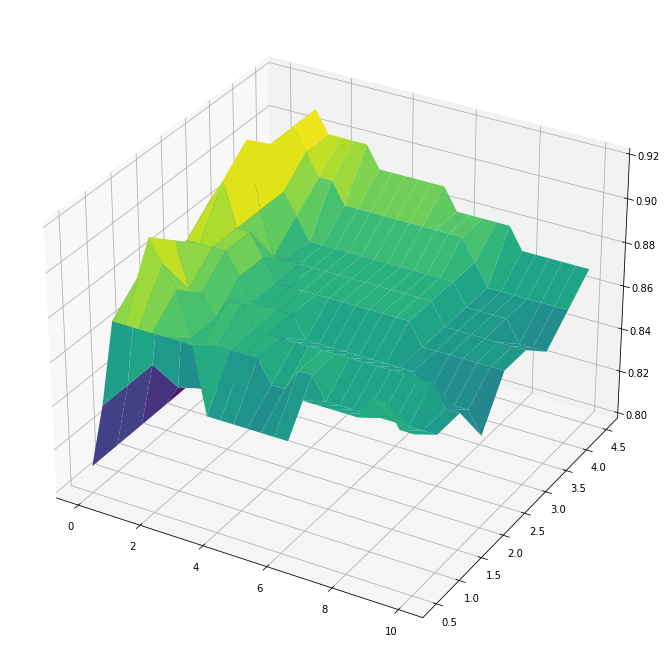

In [191]:
xx, yy = np.meshgrid(costs, gammas)

plt.figure(figsize=(12,12))
ax = plt.axes(projection="3d")
ax.plot_surface(xx, yy, errors, cmap=plt.cm.viridis)

In [192]:
df = pd.DataFrame(data=errors, index=gammas, columns=costs)

In [193]:
df[df==errors.max()]

0.01000   0.42625   0.84250   1.25875   1.67500   2.09125   2.50750   \
0.5       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1.5       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2.5       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
3.0       NaN       NaN       NaN      0.92       NaN       NaN       NaN   
3.5       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4.5       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

     2.92375   3.34000   3.75625   ...  6.25375   6.67000   7.08625   \
0.5       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1.0       NaN       NaN       NaN  ...       NaN       NaN       NaN   
1.5       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2.0       NaN       NaN       NaN  ...       NaN       NaN       NaN   
2.5       NaN       NaN       NaN  ...       NaN       NaN       NaN   
3.0       NaN       NaN       NaN  ...       NaN       NaN       NaN   
3.5       NaN       NaN       NaN  ...       NaN       NaN       NaN   
4.0       NaN       NaN       NaN  ...       NaN       NaN       NaN   
4.5       NaN       NaN       NaN  ...       NaN       NaN       NaN   

     7.50250   7.91875   8.33500   8.75125   9.16750   9.58375   10.00000  
0.5       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1.5       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
2.5       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
3.5       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4.0       NaN       NaN       NaN       NaN       NaN       NaN       NaN  
4.5       NaN       NaN       NaN       NaN       NaN       NaN       NaN  

[9 rows x 25 columns]

<AxesSubplot:>

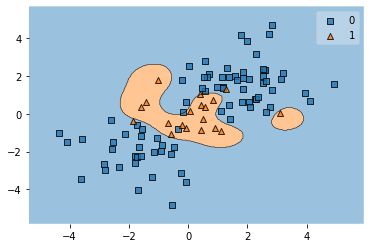

In [196]:
svc = SVC(C=3, gamma=1.25).fit(x_train, y_train)

plot_decision_regions(x_train, y_train, svc)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91        69
           1       0.91      0.65      0.75        31

    accuracy                           0.87       100
   macro avg       0.88      0.81      0.83       100
weighted avg       0.87      0.87      0.86       100



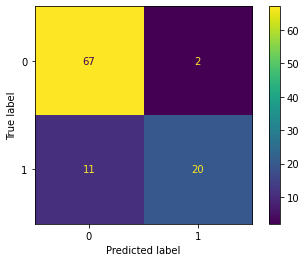

In [197]:
pred = svc.predict(x_test)

ConfusionMatrixDisplay(
    confusion_matrix(y_test, pred)
).plot()

print(classification_report(y_test, pred))

In [199]:
(2+11)/(64+17+5+14)

0.13

In [200]:
tuned_params = [
                {
                    "C": np.linspace(0.01, 10, 25),
                     "gamma": np.arange(0.5, 5, 0.5)
                }
            ]
svc = GridSearchCV(SVC(kernel="rbf"), tuned_params, cv=10, scoring="accuracy")
svc.fit(x_train, y_train)
svc.best_params_

{'C': 1.25875, 'gamma': 1.0}

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        69
           1       1.00      0.68      0.81        31

    accuracy                           0.90       100
   macro avg       0.94      0.84      0.87       100
weighted avg       0.91      0.90      0.89       100



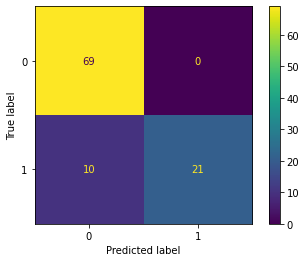

In [201]:
svc = SVC(C=1.25, gamma=1).fit(x_train, y_train)
pred = svc.predict(x_test)

ConfusionMatrixDisplay(
    confusion_matrix(y_test, pred)
).plot()

print(classification_report(y_test, pred))

In [202]:
(10)/(65+4+17+14)

0.1

<AxesSubplot:>

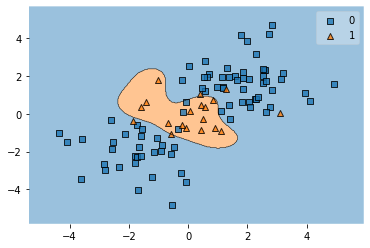

In [203]:
plot_decision_regions(x_train, y_train, svc)

### ROC Curves

In [204]:
svc_low_g = SVC(C=0.85, gamma=2.5).fit(x_train, y_train)
svc_high_g = SVC(C=0.85, gamma=1e3).fit(x_train, y_train)

In [205]:
score_low = svc_low_g.decision_function(x_train)
score_high = svc_high_g.decision_function(x_train)

In [207]:
fpr_low, tpr_low, _ = roc_curve(y_train, score_low)
fpr_high, tpr_high, _ = roc_curve(y_train, score_high)

Text(0.5, 0, 'False Positive Rate')

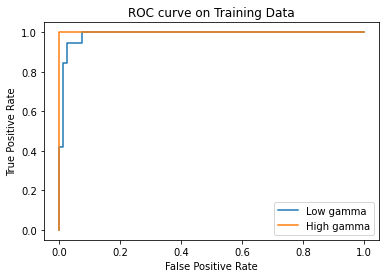

In [211]:
plt.plot(fpr_low, tpr_low, label="Low gamma")
plt.plot(fpr_high, tpr_high, label="High gamma")
plt.legend()
plt.title("ROC curve on Training Data")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [212]:
fpr_low, tpr_low, _ = roc_curve(y_test, score_low)
fpr_high, tpr_high, _ = roc_curve(y_test, score_high)

Text(0.5, 0, 'False Positive Rate')

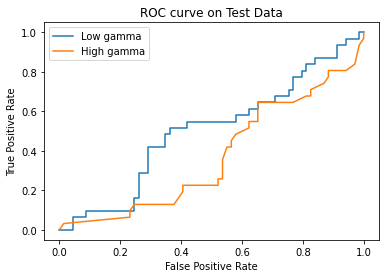

In [213]:
plt.plot(fpr_low, tpr_low, label="Low gamma")
plt.plot(fpr_high, tpr_high, label="High gamma")
plt.legend()
plt.title("ROC curve on Test Data")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

On test data, contrarly to the training roc curve, the low gamma model has better results. This is due to overfitting.

### SVM with Multiple Classes

In [215]:
x = np.random.randn(250,2)

y = np.array(
    [1 for _ in range(150)] + [2 for _ in range(50)] + [0 for _ in range(50)]
)

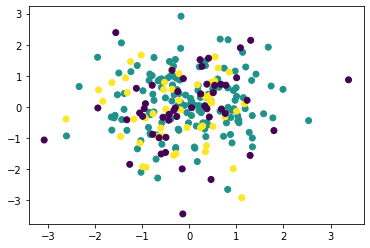

In [217]:
plt.scatter(x.T[0], x.T[1], c=y)

In [218]:
x[y==2]+=1.5

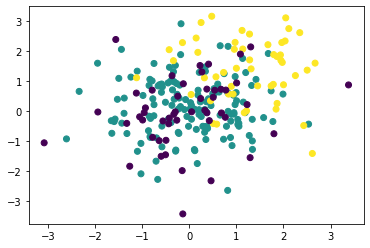

In [219]:
plt.scatter(x.T[0], x.T[1], c=y)

In [220]:
x[y==0]+=4

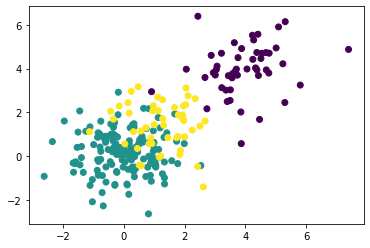

In [221]:
plt.scatter(x.T[0], x.T[1], c=y)

In [222]:
svc = SVC().fit(x, y)

<AxesSubplot:>

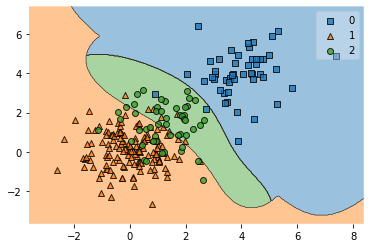

In [223]:
plot_decision_regions(x, y, svc)

### Gene Expression Data

In [240]:
df = pd.DataFrame(data = load_iris().data, columns=["Sepal Length" , "Sepal Width", "Petal Length", "Petal Width"])
df["Class"] = load_iris().target
df.head()

Sepal Length  Sepal Width  Petal Length  Petal Width  Class
0           5.1          3.5           1.4          0.2      0
1           4.9          3.0           1.4          0.2      0
2           4.7          3.2           1.3          0.2      0
3           4.6          3.1           1.5          0.2      0
4           5.0          3.6           1.4          0.2      0

In [242]:
name_class = load_iris().target_names

In [236]:
print(load_iris().DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [243]:
df.shape

(150, 5)

In [259]:
X_train = pd.read_csv("ALL CSV FILES/Khan_train.csv", index_col=0)
X_test = pd.read_csv("ALL CSV FILES/Khan_test.csv", index_col=0)

y_train = pd.read_csv("ALL CSV FILES/Khan_ytrain.csv", index_col=0)
y_test = pd.read_csv("ALL CSV FILES/Khan_ytest.csv", index_col=0)

In [262]:
from IPython.display import display
display(X_test.head(), 
        X_train.head(), 
        y_test.head(), 
        y_train.head())


V1        V2        V3        V4        V5        V6        V7  \
V1  0.139501 -1.168927  0.564973 -3.366796 -1.323132 -0.692547  2.327395   
V2  1.164275 -2.018158  1.103533 -2.165435 -1.440117 -0.437420  2.661587   
V4  0.841093  0.254720 -0.208748 -2.148149 -1.512765 -1.263723  2.946642   
V6  0.685065 -1.927579 -0.233068 -1.640413 -1.008954  0.774451  1.617168   
V7 -1.956163 -2.234926  0.281563 -2.695628 -1.214697 -1.059872  2.498070   

          V8        V9       V10  ...     V2299     V2300     V2301     V2302  \
V1  0.923703  0.112167  0.509765  ... -0.180803 -0.942635 -1.210662 -0.588787   
V2  1.224011  0.210504  1.045563  ... -0.709480 -1.532940 -2.385967 -0.389641   
V4  0.087828  0.482920  1.063020  ... -0.067958 -1.854060 -1.541312 -1.773723   
V6 -0.567925  0.036621 -0.101701  ...  1.077559 -0.263966 -1.966113 -1.086190   
V7  0.780196  1.041583  0.727500  ... -1.209320 -0.693147 -1.846427 -0.993442   

       V2303     V2304     V2305     V2306     V2307     V2308  
V1 -0.070422 -2.783852 -2.840439 -1.160913 -0.343054 -0.055513  
V2  0.422781 -2.816750 -2.422495 -1.722607 -1.703749 -1.699910  
V4 -1.879935 -2.265289 -2.405726 -0.176379 -0.128743 -0.996417  
V6  0.885914 -0.248590  0.385874 -0.508163 -0.626985 -0.699366  
V7 -3.294138 -3.332605 -2.282782 -0.656622 -2.012157 -1.668657  

[5 rows x 2308 columns]

V1        V2        V3        V4        V5        V6        V7  \
V1  0.773344 -2.438405 -0.482562 -2.721135 -1.217058  0.827809  1.342604   
V2 -0.078178 -2.415754  0.412772 -2.825146 -0.626236  0.054488  1.429498   
V3 -0.084469 -1.649739 -0.241308 -2.875286 -0.889405 -0.027474  1.159300   
V4  0.965614 -2.380547  0.625297 -1.741256 -0.845366  0.949687  1.093801   
V5  0.075664 -1.728785  0.852626  0.272695 -1.841370  0.327936  1.251219   

          V8        V9       V10  ...     V2299     V2300     V2301     V2302  \
V1  0.057042  0.133569  0.565427  ... -0.238511 -0.027474 -1.660205  0.588231   
V2 -0.120249  0.456792  0.159053  ... -0.657394 -0.246284 -0.836325 -0.571284   
V3  0.015676  0.191942  0.496585  ... -0.696352  0.024985 -1.059872 -0.403767   
V4  0.819736 -0.284620  0.994732  ...  0.259746  0.357115 -1.893128  0.255107   
V5  0.771450  0.030917  0.278313  ... -0.200404  0.061753 -2.273998 -0.039365   

       V2303     V2304     V2305     V2306     V2307     V2308  
V1 -0.463624 -3.952845 -5.496768 -1.414282 -0.647600 -1.763172  
V2  0.034788 -2.478130 -3.661264 -1.093923 -1.209320 -0.824395  
V3 -0.678653 -2.939352 -2.736450 -1.965399 -0.805868 -1.139434  
V4  0.163309 -1.021929 -2.077843 -1.127629  0.331531 -2.179483  
V5  0.368801 -2.566551 -1.675044 -1.082050 -0.965218 -1.836966  

[5 rows x 2308 columns]

x
1  3
2  2
3  4
4  2
5  1

x
1  2
2  2
3  2
4  2
5  2

In [270]:
svc = SVC(kernel="linear", C=10).fit(X_train, y_train.to_numpy().flatten())

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        23
           3       1.00      1.00      1.00        12
           4       1.00      1.00      1.00        20

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



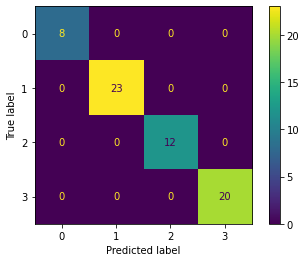

In [274]:
pred = svc.predict(X_train)

print(classification_report(y_train, pred))

ConfusionMatrixDisplay(
    confusion_matrix(y_train, pred)
).plot()

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         3
           2       0.75      1.00      0.86         6
           3       1.00      0.67      0.80         6
           4       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.94      0.92      0.91        20
weighted avg       0.93      0.90      0.90        20



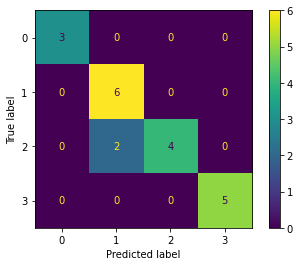

In [275]:
pred = svc.predict(X_test)

print(classification_report(y_test, pred))

ConfusionMatrixDisplay(
    confusion_matrix(y_test, pred)
).plot()

## Applied
> 4

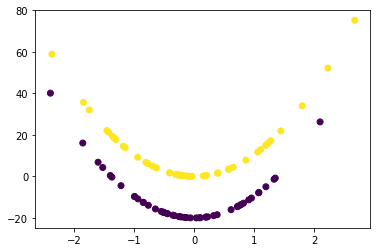

In [377]:
x1 = np.random.randn(100,1)#np.arange(100).reshape(100,1)
x2 = 10.5*x1**2
y = np.repeat([-1,1], 50)

x2[y==-1]-=20
#np.random.shuffle(y)
plt.scatter(x1, x2, c=y)

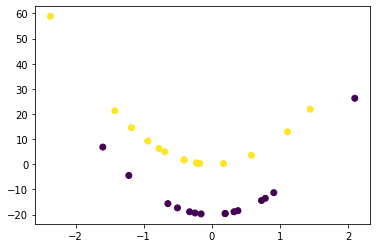

In [378]:
x=np.concatenate((x1, x2), axis=1)
(X_train, X_test,
y_train, y_test) = train_test_split(x,y,train_size=0.3)

plt.scatter(X_train.T[0], X_train.T[1], c=y_train)

In [400]:
linear = SVC(kernel="linear").fit(X_train, y_train)
poly = SVC(kernel="poly", C=10, gamma=2).fit(X_train, y_train)
radial = SVC(C=10).fit(X_train, y_train)

              precision    recall  f1-score   support

          -1       1.00      0.80      0.89        15
           1       0.83      1.00      0.91        15

    accuracy                           0.90        30
   macro avg       0.92      0.90      0.90        30
weighted avg       0.92      0.90      0.90        30



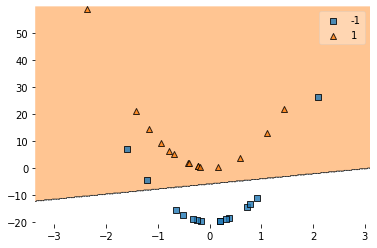

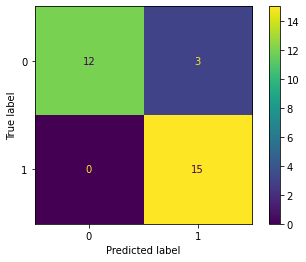

In [394]:
plot_decision_regions(X_train, y_train, linear)

pred = linear.predict(X_train)
ConfusionMatrixDisplay(
    confusion_matrix(y_train, pred)
).plot()

print(classification_report(y_train, pred))

              precision    recall  f1-score   support

          -1       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



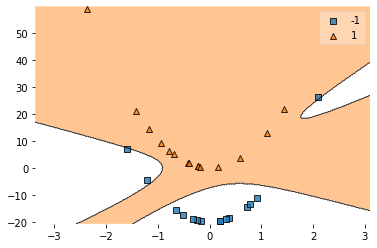

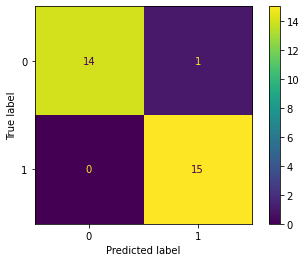

In [401]:
plot_decision_regions(X_train, y_train, poly)

pred = poly.predict(X_train)
ConfusionMatrixDisplay(
    confusion_matrix(y_train, pred)
).plot()

print(classification_report(y_train, pred))

              precision    recall  f1-score   support

          -1       1.00      0.87      0.93        15
           1       0.88      1.00      0.94        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



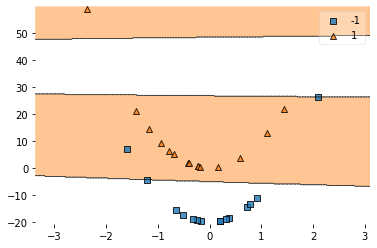

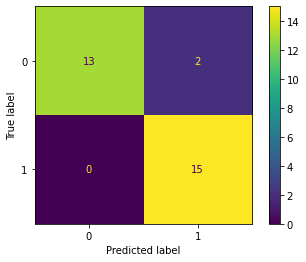

In [399]:
plot_decision_regions(X_train, y_train, radial)

pred = radial.predict(X_train)
ConfusionMatrixDisplay(
    confusion_matrix(y_train, pred)
).plot()

print(classification_report(y_train, pred))

With some adjustments to the parameters, both the radial and the polynomial models can outperform the linear model by overfitting the training data, as they are more flexible

              precision    recall  f1-score   support

          -1       1.00      0.80      0.89        35
           1       0.83      1.00      0.91        35

    accuracy                           0.90        70
   macro avg       0.92      0.90      0.90        70
weighted avg       0.92      0.90      0.90        70



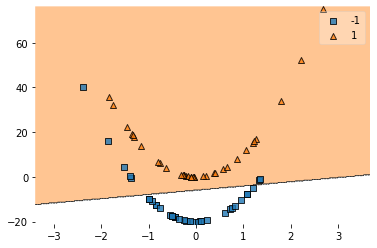

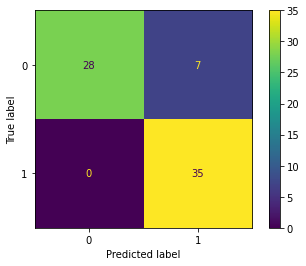

In [402]:
plot_decision_regions(X_test, y_test, linear)

pred = linear.predict(X_test)
ConfusionMatrixDisplay(
    confusion_matrix(y_test, pred)
).plot()

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       1.00      0.71      0.83        35
           1       0.78      1.00      0.88        35

    accuracy                           0.86        70
   macro avg       0.89      0.86      0.85        70
weighted avg       0.89      0.86      0.85        70



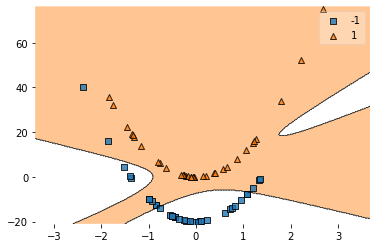

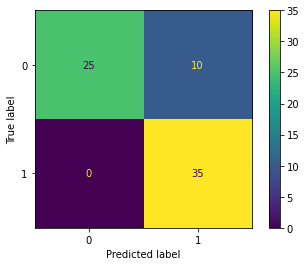

In [403]:
plot_decision_regions(X_test, y_test, poly)

pred = poly.predict(X_test)
ConfusionMatrixDisplay(
    confusion_matrix(y_test, pred)
).plot()

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.90      0.80      0.85        35
           1       0.82      0.91      0.86        35

    accuracy                           0.86        70
   macro avg       0.86      0.86      0.86        70
weighted avg       0.86      0.86      0.86        70



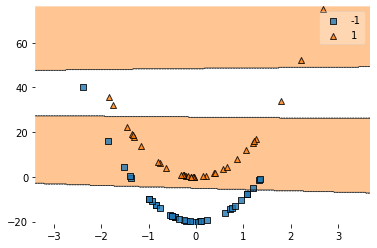

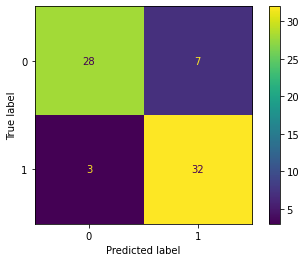

In [404]:
plot_decision_regions(X_test, y_test, radial)

pred = radial.predict(X_test)
ConfusionMatrixDisplay(
    confusion_matrix(y_test, pred)
).plot()

print(classification_report(y_test, pred))

Although radial and polynomial had better results in training, in the test scenario the model with the highest accuracy is the linear model
> 5
>> 5.a)/5.b)

In [412]:
x1 = np.random.uniform(size=500) - 0.5
x2 = np.random.uniform(size=500) - 0.5

y = 1*(x1**2 - x2**2 > 0)

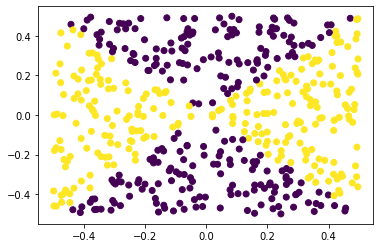

In [413]:
plt.scatter(x1,x2,c=y)

>> 5.c)/5.d)

In [414]:
x = x1.reshape(500, 1), x2.reshape(500, 1)
x = np.concatenate(x, axis=1)

In [415]:
log = LogisticRegression().fit(x,y)

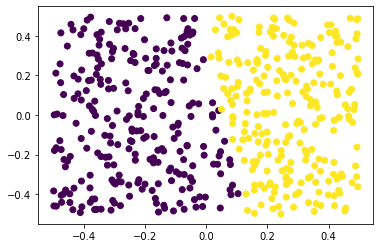

In [417]:
pred = log.predict(x)

plt.scatter(x.T[0], x.T[1], c=pred)

>> 5.e)/5.f)

In [418]:
non_linx = np.concatenate((x, x**2), axis=1)

In [420]:
log = LogisticRegression().fit(non_linx, y)

pred = log.predict(non_linx)

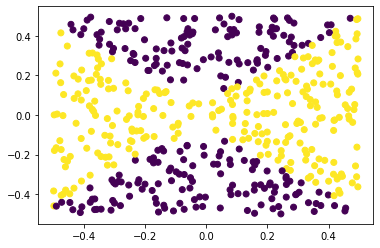

In [421]:
plt.scatter(non_linx.T[0], non_linx.T[1], c=pred)

>> 5.g)/5.h)

<AxesSubplot:>

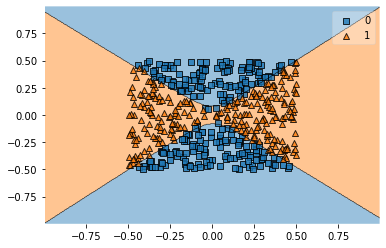

In [423]:
svc = SVC(kernel="poly", degree=2).fit(x, y)

plot_decision_regions(x, y, svc, zoom_factor=2)

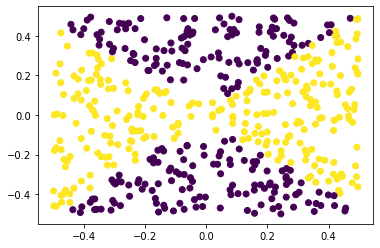

In [424]:
pred = svc.predict(x)

plt.scatter(x.T[0], x.T[1], c=pred)

The decision regions generated by both the SVM and the Logit models are barely the same.

This is indicative that a SVM with a polynomial kernel works as a LogisticRegression

>> 6.a)

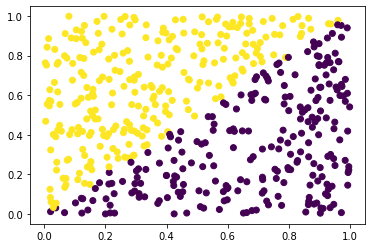

In [443]:
x1 = np.random.uniform(size=500) 
x2 = np.random.uniform(size=500) 

y = (x2 > x1).astype(int)

plt.scatter(x1,x2,c=y)

In [444]:
x = (x1.reshape(500,1), x2.reshape(500,1))
x = np.concatenate(x, axis=1)

In [478]:
costs = np.linspace(0.1, 1000, 100)
CVResults = pd.DataFrame(columns=["SVC", "Score"])

for c in costs:
    svc = SVC(C=c, kernel="linear").fit(x,y)
    
    score = cross_val_score(svc, x, y, cv=10, scoring="accuracy").mean()
    CVResults.loc[c] = {"SVC":svc,
                       "Score": score}

In [479]:
CVResults.Score.max(), CVResults.Score.argmax()

(0.992, 25)

<AxesSubplot:>

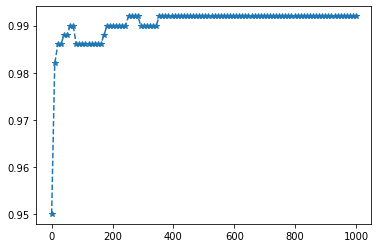

In [480]:
CVResults.Score.plot(ls="--", marker="*")

In [481]:
svc = CVResults.iloc[85].SVC.fit(x, y)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       241
           1       0.99      1.00      0.99       259

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



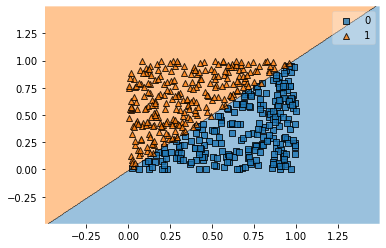

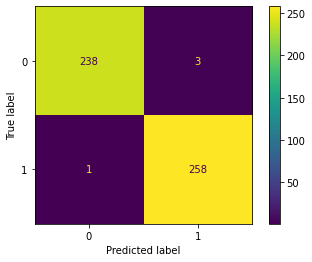

In [482]:
pred = svc.predict(x)

plot_decision_regions(x,y, svc, zoom_factor=2)
print(classification_report(y, pred))
ConfusionMatrixDisplay(
    confusion_matrix(y, pred)
).plot()

Training missclassification lower as C increases. 

In [483]:
x1_test = np.random.uniform(size=100) 
x2_test = np.random.uniform(size=100) 

y_test = (x2_test > x1_test).astype(int)

In [485]:
x_test = ( x1_test.reshape(100,1), x2_test.reshape(100,1) )
x_test = np.concatenate(x_test, axis=1)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.98      1.00      0.99        49

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



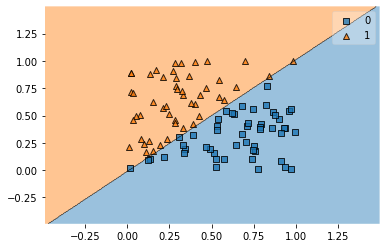

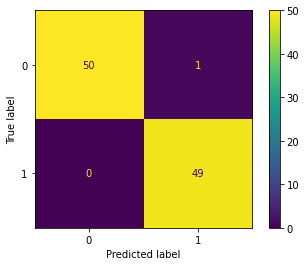

In [486]:
pred = svc.predict(x_test)

plot_decision_regions(x_test,y_test, svc, zoom_factor=2)
print(classification_report(y_test, pred))
ConfusionMatrixDisplay(
    confusion_matrix(y_test, pred)
).plot()

In [488]:
costs = np.linspace(0.1, 1000, 25)
CVResults = pd.DataFrame(columns=["SVC", "Score"])

for c in costs:
    svc = SVC(C=c, kernel="linear").fit(x,y)
    
    pred = svc.predict(x_test)
    score = accuracy_score(y_test, pred)
    CVResults.loc[c] = {"SVC":svc,
                       "Score": score}

<AxesSubplot:>

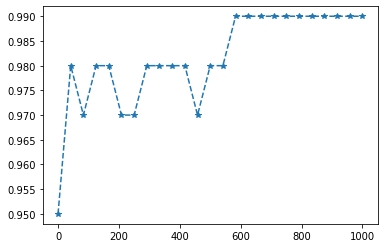

In [490]:
CVResults.Score.plot(ls="--", marker="*")

Because the generated data had no noise associated with it, the cv results on the training data are the best scenarios for the generated test set ( which also had no noise ) 

> 7.a)

In [491]:
df = get_rdataset("Auto", "ISLR", True).data

In [492]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
1  18.0          8         307.0         130    3504          12.0    70   
2  15.0          8         350.0         165    3693          11.5    70   
3  18.0          8         318.0         150    3436          11.0    70   
4  16.0          8         304.0         150    3433          12.0    70   
5  17.0          8         302.0         140    3449          10.5    70   

   origin                       name  
1       1  chevrolet chevelle malibu  
2       1          buick skylark 320  
3       1         plymouth satellite  
4       1              amc rebel sst  
5       1                ford torino

In [498]:
y = df.mpg.apply(lambda x: 1 if x>df.mpg.median() else 0)

In [500]:
df.name = pd.factorize(df.name)[0]

#### Linear CV

In [505]:
params = [{"C": [10**i for i in range(-1,4)] }]
svc = GridSearchCV(SVC(kernel="linear"), params, scoring="accuracy", cv=10).fit(df, y)

In [506]:
svc.best_params_

{'C': 10}

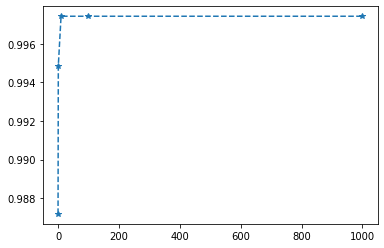

In [516]:
plt.plot(svc.cv_results_["param_C"].data, svc.cv_results_["mean_test_score"], "--*")

In [518]:
svc = SVC(C=10, kernel="linear").fit(df, y)

#### Radial CV

In [540]:
params = [{"C": [10**i for i in range(-1,4)],
          "gamma": [10**i for i in range(-2,3)]
          }]
svc = GridSearchCV(SVC(kernel="rbf"), params, scoring="accuracy", cv=10).fit(df, y)

In [541]:
svc.best_params_

{'C': 10, 'gamma': 0.01}

#### Poly CV

In [544]:
params = [{"C": [10**i for i in range(-1,4)],
          "degree": [i for i in range(2,5)]
          }]
svc = GridSearchCV(SVC(kernel="poly"), params, scoring="accuracy", cv=10).fit(df, y)

In [545]:
svc.best_params_

{'C': 1000, 'degree': 2}

>8

In [3]:
df=get_rdataset("OJ", "ISLR", True).data

In [4]:
df.head()

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000           0.24      1  
1   0.150754   0.000000           0.24      1  
2   0.000000   0.091398           0.23      1  
3   0.000000   0.000000           0.00      1  
4   0.000000   0.000000           0.00      0

In [5]:
df.Purchase = pd.factorize(df.Purchase)[0]
df.Store7 = df.Store7.map({"No":0, "Yes":1})

In [6]:
df.head()

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0         0             237        1     1.75     1.99    0.00     0.0   
1         0             239        1     1.75     1.99    0.00     0.3   
2         0             245        1     1.86     2.09    0.17     0.0   
3         1             227        1     1.69     1.69    0.00     0.0   
4         0             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff  \
0          0          0  0.500000         1.99         1.75       0.24   
1          0          1  0.600000         1.69         1.75      -0.06   
2          0          0  0.680000         2.09         1.69       0.40   
3          0          0  0.400000         1.69         1.69       0.00   
4          0          0  0.956535         1.69         1.69       0.00   

   Store7  PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0       0   0.000000   0.000000           0.24      1  
1       0   0.150754   0.000000           0.24      1  
2       0   0.000000   0.091398           0.23      1  
3       0   0.000000   0.000000           0.00      1  
4       1   0.000000   0.000000           0.00      0

In [7]:
X = df.drop(columns="Purchase")
y = df.Purchase

In [8]:
(X_train, X_test,
y_train, y_test) = train_test_split(X, y, train_size=800)

In [9]:
lin = SVC(kernel="linear", C=0.01).fit(X_train, y_train)
print_stats(lin)


      kernel: linear
      cost: 0.01
      gamma: scale
    
    Number of support vectors: 608
    [305 303]
    
    Number of classes: 2
    [0 1]
    


### Linear Kernel

In [10]:
def results(model, X, y):
    pred = model.predict(X)

    print(classification_report(y, pred))
    ConfusionMatrixDisplay(
        confusion_matrix(y, pred)
    ).plot()

    print("Error rate =", (pred!=y).sum()/len(pred))

              precision    recall  f1-score   support

           0       0.74      0.93      0.83       496
           1       0.81      0.47      0.60       304

    accuracy                           0.76       800
   macro avg       0.78      0.70      0.71       800
weighted avg       0.77      0.76      0.74       800

Error rate = 0.2425


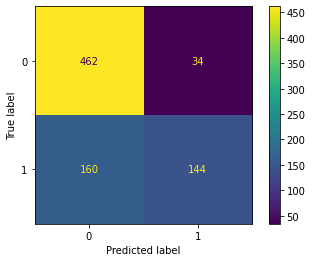

In [11]:
results(lin, X_train, y_train)

              precision    recall  f1-score   support

           0       0.71      0.92      0.80       157
           1       0.82      0.47      0.60       113

    accuracy                           0.73       270
   macro avg       0.76      0.70      0.70       270
weighted avg       0.75      0.73      0.72       270

Error rate = 0.26666666666666666


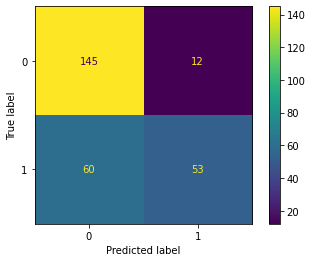

In [12]:
results(lin, X_test, y_test)

In [13]:
params = [{
    "C" : [10**i for i in range(-2,3)]
}]
GridSearchCV(SVC(kernel="linear"), params).fit(X_train, y_train).best_params_

{'C': 10}

              precision    recall  f1-score   support

           0       0.86      0.88      0.87       496
           1       0.80      0.77      0.78       304

    accuracy                           0.84       800
   macro avg       0.83      0.82      0.83       800
weighted avg       0.84      0.84      0.84       800

Error rate = 0.1625


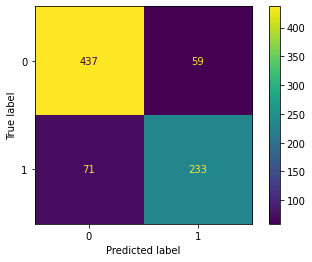

In [16]:
svc = SVC(C = 10, kernel="linear").fit(X_train, y_train)
results(svc, X_train, y_train)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       157
           1       0.83      0.76      0.79       113

    accuracy                           0.83       270
   macro avg       0.83      0.82      0.83       270
weighted avg       0.83      0.83      0.83       270

Error rate = 0.16666666666666666


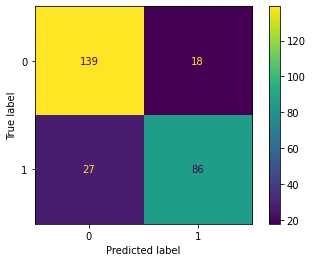

In [17]:
results(svc, X_test, y_test)

Test error = 0.167

### Radial Kernel

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       496
           1       0.00      0.00      0.00       304

    accuracy                           0.62       800
   macro avg       0.31      0.50      0.38       800
weighted avg       0.38      0.62      0.47       800

Error rate = 0.38


C:\Users\joelp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joelp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joelp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

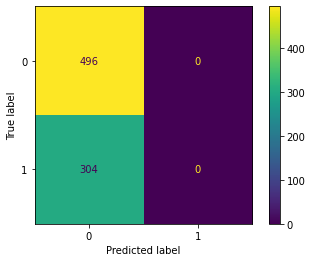

In [18]:
radial = SVC().fit(X_train,y_train)
results(radial, X_train, y_train)

In [19]:
params = [{
    "C" : [10**i for i in range(-2,5)],
    "gamma": [10**i for i in range(-2,5)]
}]
GridSearchCV(SVC(), params).fit(X_train, y_train).best_params_

{'C': 10, 'gamma': 0.01}

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       496
           1       0.86      0.72      0.78       304

    accuracy                           0.85       800
   macro avg       0.85      0.82      0.83       800
weighted avg       0.85      0.85      0.84       800

Error rate = 0.1525


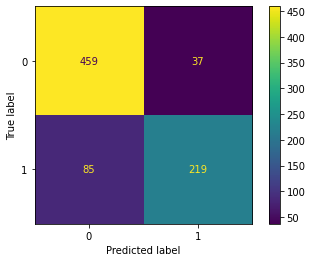

In [20]:
svc = SVC(C=10, gamma=0.01).fit(X_train, y_train)
results(svc, X_train, y_train)

              precision    recall  f1-score   support

           0       0.80      0.90      0.84       157
           1       0.83      0.68      0.75       113

    accuracy                           0.81       270
   macro avg       0.81      0.79      0.80       270
weighted avg       0.81      0.81      0.80       270

Error rate = 0.1925925925925926


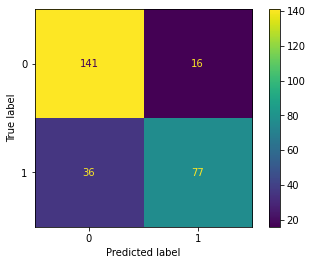

In [21]:
results(svc, X_test, y_test)

Small improvement, test error = 0.19

### Polynomial Kernel

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       496
           1       0.00      0.00      0.00       304

    accuracy                           0.62       800
   macro avg       0.31      0.50      0.38       800
weighted avg       0.38      0.62      0.47       800

Error rate = 0.38


C:\Users\joelp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joelp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\joelp\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

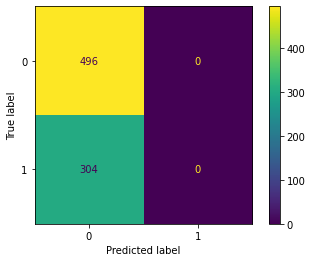

In [23]:
poly = SVC(kernel="poly").fit(X_train,y_train)
results(poly, X_train, y_train)

In [27]:
params = [{
    "C" : [10**i for i in range(-2,4)],
#    "gamma": [10**i for i in range(-2,5)],
    "degree": [i for i in range(2, 5)]
}]
GridSearchCV(SVC(kernel="poly"), params).fit(X_train, y_train).best_params_

{'C': 1000, 'degree': 4}

              precision    recall  f1-score   support

           0       0.86      0.87      0.87       496
           1       0.79      0.76      0.77       304

    accuracy                           0.83       800
   macro avg       0.82      0.82      0.82       800
weighted avg       0.83      0.83      0.83       800

Error rate = 0.16875


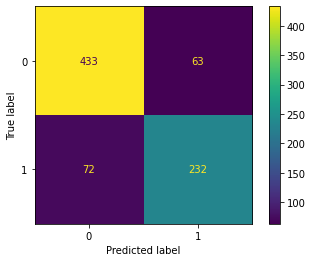

In [28]:
svc = SVC(kernel="poly", degree=4, C=1000).fit(X_train, y_train)
results(svc, X_train, y_train)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       157
           1       0.79      0.75      0.77       113

    accuracy                           0.81       270
   macro avg       0.81      0.81      0.81       270
weighted avg       0.81      0.81      0.81       270

Error rate = 0.18518518518518517


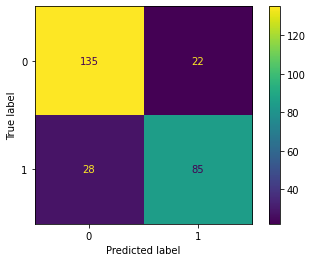

In [29]:
results(svc, X_test, y_test)

Test error in poly is 0.185

The model with best test error is the one with a linear Kernel